In [1]:
kaggle_folder = "/content/drive/MyDrive/Kaggle"

In [1]:
# prompt: go to kaggle folder as working dir

import os
kaggle_folder = "/content/drive/MyDrive/Kaggle"
os.chdir(kaggle_folder)
!pwd


/content/drive/MyDrive/Kaggle


In [3]:
!kaggle datasets download -d kyanyoga/sample-sales-data

Dataset URL: https://www.kaggle.com/datasets/kyanyoga/sample-sales-data
License(s): CC0-1.0
  0% 0.00/77.5k [00:00<?, ?B/s]
100% 77.5k/77.5k [00:00<00:00, 5.00MB/s]


In [4]:
import zipfile
with zipfile.ZipFile("sample-sales-data.zip", "r") as zip_ref:
    zip_ref.extractall("sales_data")

In [3]:
import pandas as pd

df = pd.read_csv("sales_data/sales_data_sample.csv", encoding='latin1')

In [6]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [8]:
df = df[['ORDERDATE', 'SALES']]
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df.set_index('ORDERDATE', inplace=True)
df = df.resample('M').sum()
df = df.sort_index()


<ipython-input-8-9f6a4da686a2>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()


In [9]:
df.head()

,SALES
ORDERDATE,
2003-01-31,129753.60
2003-02-28,140836.19
2003-03-31,174504.90
2003-04-30,201609.55
2003-05-31,192673.11


In [10]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['SALES'] = scaler.fit_transform(df[['SALES']])

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.1333 - val_loss: 0.0672
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 0.1277 - val_loss: 0.0620
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.1227 - val_loss: 0.0571
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.1183 - val_loss: 0.0528
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - loss: 0.1143 - val_loss: 0.0487
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.1104 - val_loss: 0.0449
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 0.1067 - val_loss: 0.0412
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 0.1030 - val_loss: 0.0376
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 0.0994 - val_loss: 0.0342
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - loss: 0.0958 - val_loss: 0.0308
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 0.0921 - val_loss: 0.0275
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - loss: 0.0884 - val_loss:

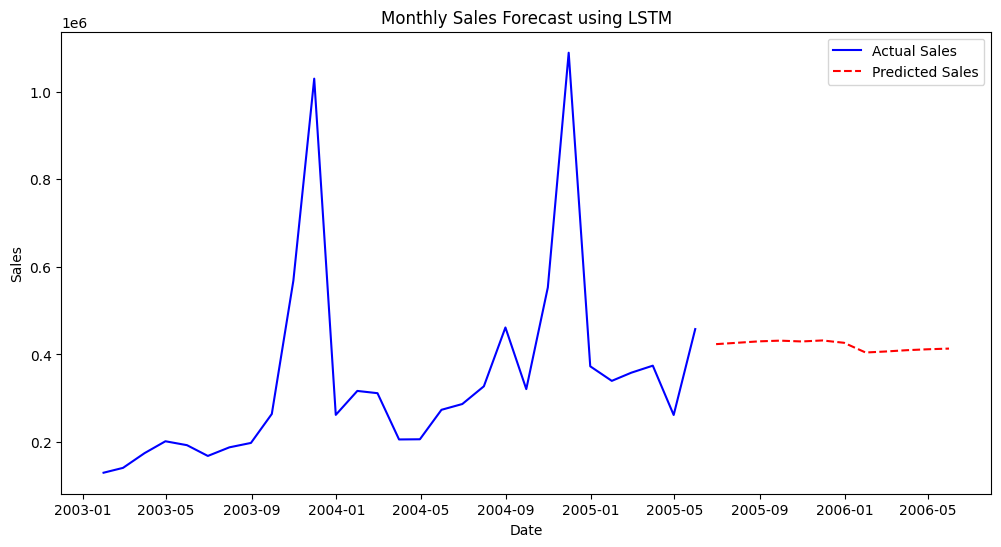

In [17]:
import numpy as np

def create_sequences(data, seq_length=12):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 12  # Look back 12 months
X, y = create_sequences(df['SALES'].values, SEQ_LENGTH)

# Split into train/test (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(SEQ_LENGTH, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Predict future sales for the next 12 months
future_input = X[-1]  # Last known sequence
future_predictions = []

for _ in range(12):  # Predict next 12 months
    pred = model.predict(future_input.reshape(1, SEQ_LENGTH, 1))[0]
    future_predictions.append(pred)
    future_input = np.append(future_input[1:], pred)  # Slide window

# Convert predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, scaler.inverse_transform(df[['SALES']]), label="Actual Sales", color="blue")
plt.plot(pd.date_range(df.index[-1], periods=13, freq='M')[1:], future_predictions, label="Predicted Sales", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Forecast using LSTM")
plt.legend()
plt.show()

In [18]:
# Take the last month's sales data as input
previous_month_sales = df['SALES'].values[-12:].reshape(1, 12, 1)  # Last 12 months
predicted_sales = model.predict(previous_month_sales)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


In [19]:
# Inverse transform to get actual sales value
predicted_sales = scaler.inverse_transform(predicted_sales.reshape(-1, 1))


In [20]:
print(f"Predicted sales for next month: {predicted_sales[0][0]:.2f}")


Predicted sales for next month: 427096.72


In [21]:
from tensorflow.keras.layers import GRU

# Build GRU Model
gru_model = Sequential([
    GRU(50, activation='relu', return_sequences=True, input_shape=(SEQ_LENGTH, 1)),
    GRU(50, activation='relu'),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')

# Train GRU model
gru_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Predict using GRU
gru_predictions = []
future_input = X[-1]  # Last known sequence

for _ in range(12):
    pred = gru_model.predict(future_input.reshape(1, SEQ_LENGTH, 1))[0]
    gru_predictions.append(pred)
    future_input = np.append(future_input[1:], pred)

gru_predictions = scaler.inverse_transform(np.array(gru_predictions).reshape(-1, 1))


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.1154 - val_loss: 0.0452
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step - loss: 0.1079 - val_loss: 0.0386
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.1011 - val_loss: 0.0327
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.0948 - val_loss: 0.0273
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.0888 - val_loss: 0.0225
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0833 - val_loss: 0.0181
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 0.0781 - val_loss: 0.0144
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 0.0733 - val_loss: 0.0113
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - loss: 0.0691 - val_loss: 0.0090
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0653 - val_loss: 0.0073
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 0.0620 - val_loss: 0.0065
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 0.0594 - val_loss:

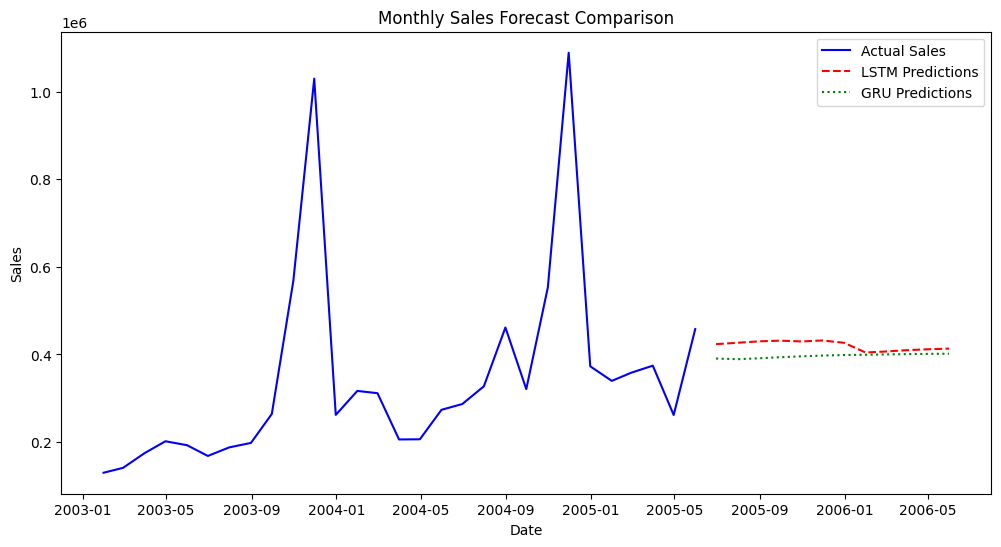

In [23]:
plt.figure(figsize=(12,6))

# Actual Sales
plt.plot(df.index, scaler.inverse_transform(df[['SALES']]), label="Actual Sales", color="blue")

# LSTM Predictions
plt.plot(pd.date_range(df.index[-1], periods=13, freq='M')[1:], future_predictions, label="LSTM Predictions", color="red", linestyle="dashed")

# GRU Predictions
plt.plot(pd.date_range(df.index[-1], periods=13, freq='M')[1:], gru_predictions, label="GRU Predictions", color="green", linestyle="dotted")


plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Forecast Comparison")
plt.legend()
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load data
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['YEAR_MONTH'] = df['ORDERDATE'].dt.to_period('M')  # Year-Month grouping

# Aggregate sales per month
monthly_sales = df.groupby('YEAR_MONTH')['SALES'].sum().reset_index()
monthly_sales['YEAR_MONTH'] = monthly_sales['YEAR_MONTH'].astype(str)  # Convert period to string

# Create lag features (previous month sales)
monthly_sales['PREV_SALES'] = monthly_sales['SALES'].shift(1)

# Drop NaN (first row will have NaN for PREV_SALES)
monthly_sales = monthly_sales.dropna()

# Prepare dataset
X = monthly_sales[['PREV_SALES']]
y = monthly_sales['SALES']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae}, RMSE: {rmse}")

# Forecast Next Month's Sales
next_month_sales = model.predict([[y_test.iloc[-1]]])
print(f"Forecasted Sales for Next Month: {next_month_sales[0]}")


MAE: 112897.56040000038, RMSE: 119801.44082178143
Forecasted Sales for Next Month: 507074.09709999926


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [9]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Prepare training data
X_train = monthly_sales[['PREV_SALES']][:-1]  # All but last row
y_train = monthly_sales['SALES'][:-1]  # Target column

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get last known sales value for forecasting
last_known_sales = monthly_sales['SALES'].iloc[-1]

# Generate future predictions (next 12 months)
rf_predictions = []
for _ in range(12):
    predicted_value = rf_model.predict([[last_known_sales]])[0]
    rf_predictions.append(predicted_value)
    last_known_sales = predicted_value  # Use prediction for next step

# Convert to NumPy array
rf_predictions = np.array(rf_predictions)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

<ipython-input-10-0d866159585d>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=13, freq='M')[1:], rf_predictions,


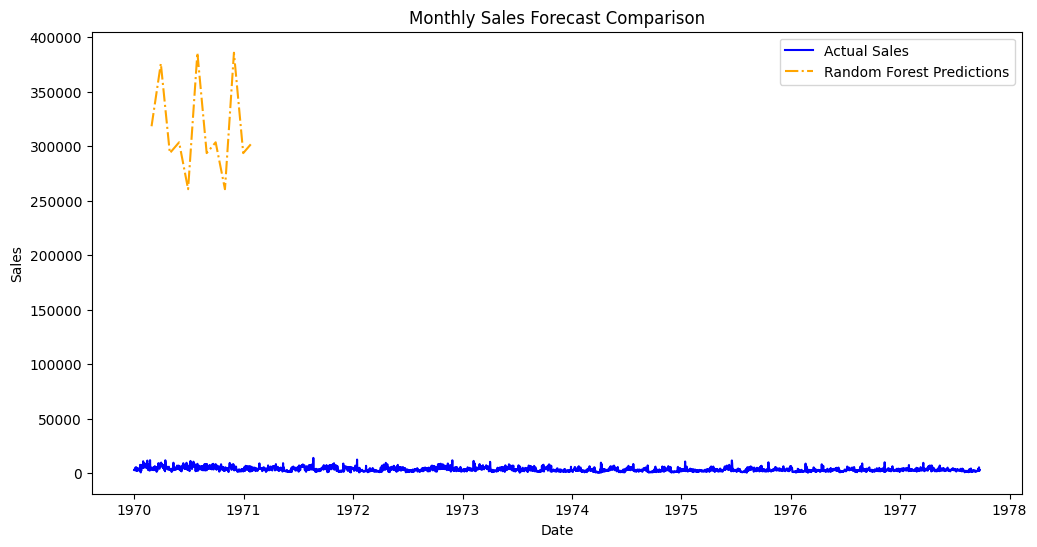

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))

# Actual Sales
plt.plot(df.index, scaler.inverse_transform(df[['SALES']]), label="Actual Sales", color="blue")

# LSTM Predictions


# Random Forest Predictions
plt.plot(pd.date_range(df.index[-1], periods=13, freq='M')[1:], rf_predictions,
         label="Random Forest Predictions", color="orange", linestyle="dashdot")

# Labels and Title
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Forecast Comparison")
plt.legend()
plt.show()


In [11]:
import joblib
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Prepare training data
X_train = monthly_sales[['PREV_SALES']][:-1]  # Input: previous month's sales
y_train = monthly_sales['SALES'][:-1]  # Target: actual sales

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save the model
joblib.dump(rf_model, "rf_sales_forecast.pkl")  # Save as .pkl (since .h5 is not supported)
print("Model saved successfully as rf_sales_forecast.pkl")


Model saved successfully as rf_sales_forecast.pkl


In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import joblib
import numpy as np

app = Flask(__name__)
CORS(app)  # Enable CORS

# Load the saved Random Forest model
model = joblib.load("rf_sales_forecast.pkl")

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()  # Get JSON data from request
        last_month_sales = float(data['last_month_sales'])  # Extract input

        # Predict next month's sales
        prediction = model.predict([[last_month_sales]])[0]

        # Return the result
        return jsonify({"next_month_sales": prediction})

    except Exception as e:
        return jsonify({"error": str(e)})

if __name__ == '__main__':
    app.run(debug=True)


Improved Model saved successfully!
Mean Absolute Error: 88696.49


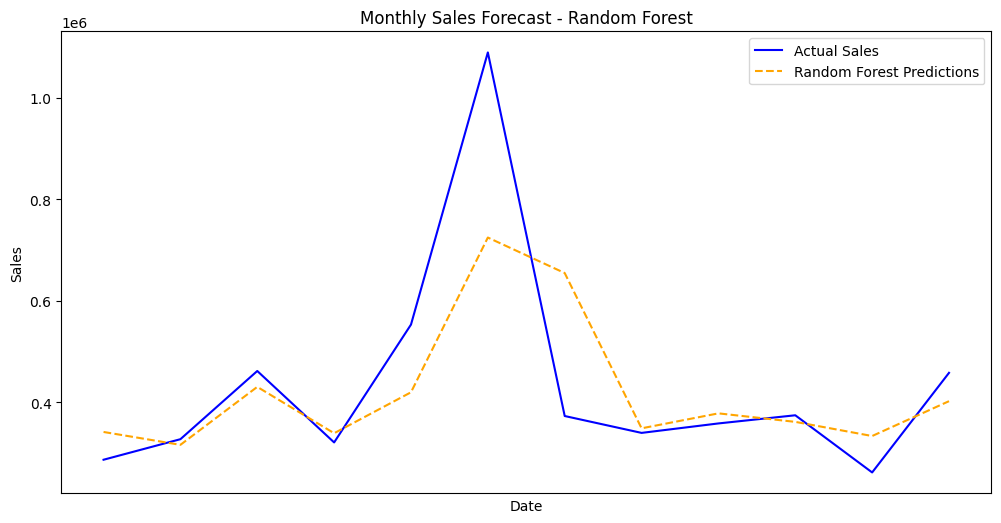

In [17]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Assuming `monthly_sales` is your DataFrame with 'PREV_SALES' and 'SALES'
X_train = monthly_sales[['PREV_SALES']][:-1]
y_train = monthly_sales['SALES'][:-1]
X_test = monthly_sales[['PREV_SALES']][-12:]  # Last 12 months for testing
y_test = monthly_sales['SALES'][-12:]

# Train an improved Random Forest model
rf_model = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)

# Save the model
joblib.dump(rf_model, "rf_sales_forecast_v1.pkl")
print("Improved Model saved successfully!")

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, rf_predictions)
print(f"Mean Absolute Error: {mae:.2f}")

# Convert test index to DateTime (if not already)
monthly_sales.index = pd.to_datetime(monthly_sales.index)

# Plot actual vs predicted sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index[-12:], y_test, label="Actual Sales", color="blue")
plt.plot(monthly_sales.index[-12:], rf_predictions, label="Random Forest Predictions", color="orange", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Forecast - Random Forest")
plt.legend()
plt.show()


In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

# Load and preprocess the data
def preprocess_data(df):
    # Convert ORDERDATE to datetime
    df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

    # Group by month and calculate total sales
    monthly_sales = df.groupby(pd.Grouper(key='ORDERDATE', freq='M'))['SALES'].sum().reset_index()
    return monthly_sales

# Create sequences for time series prediction
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Build LSTM model
def build_model(sequence_length):
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Main processing
def train_sales_predictor(df, sequence_length=3):
    # Preprocess data
    monthly_sales = preprocess_data(df)

    # Scale the data
    scaler = MinMaxScaler()
    sales_scaled = scaler.fit_transform(monthly_sales['SALES'].values.reshape(-1, 1))

    # Create sequences
    X, y = create_sequences(sales_scaled, sequence_length)

    # Split into train and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build and train model
    model = build_model(sequence_length)
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

    # Function to predict next month's sales
    def predict_next_month(recent_sales):
        scaled_input = scaler.transform(recent_sales.reshape(-1, 1))
        scaled_input = scaled_input.reshape(1, sequence_length, 1)
        scaled_prediction = model.predict(scaled_input)
        prediction = scaler.inverse_transform(scaled_prediction)
        return prediction[0][0]

    return model, scaler, predict_next_month

# Using the model
# Assuming df is your loaded DataFrame
model, scaler, predict_next_month = train_sales_predictor(df)

# To predict next month's sales, use the last 3 months of sales
last_3_months = df.groupby(pd.Grouper(key='ORDERDATE', freq='M'))['SALES'].sum().tail(3).values
next_month_prediction = predict_next_month(last_3_months)

print(f"Predicted sales for next month: ${next_month_prediction:,.2f}")

Epoch 1/50


<ipython-input-21-00b2d1b8f4d9>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='ORDERDATE', freq='M'))['SALES'].sum().reset_index()
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0886 - val_loss: 0.6234
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0867 - val_loss: 0.6161
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0848 - val_loss: 0.6087
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.0830 - val_loss: 0.6013
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.0812 - val_loss: 0.5941
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - loss: 0.0794 - val_loss: 0.5869
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0778 - val_loss: 0.5797
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0762 - val_loss: 0.5726
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 0.0746 - val_loss: 0.5656
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0731 - val_loss: 0.5587
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0717 - val_loss: 0.5519
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 0.0703 - val_loss: 0.5452
Epoc

<ipython-input-21-00b2d1b8f4d9>:69: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_3_months = df.groupby(pd.Grouper(key='ORDERDATE', freq='M'))['SALES'].sum().tail(3).values


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Predicted sales for next month: $21.65


<ipython-input-21-00b2d1b8f4d9>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='ORDERDATE', freq='M'))['SALES'].sum().reset_index()
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.0517 - val_loss: 0.1584 - learning_rate: 0.0010
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 0.0492 - val_loss: 0.1527 - learning_rate: 0.0010
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 0.0468 - val_loss: 0.1470 - learning_rate: 0.0010
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - loss: 0.0443 - val_loss: 0.1414 - learning_rate: 0.0010
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 0.0422 - val_loss: 0.1360 - learning_rate: 0.0010
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - loss: 0.0406 - val_loss: 0.1306 - learning_rate: 0.0010
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 0.0385 - val_loss: 0.1251 - learning_rate: 0.0010
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.0363 - val_loss: 0.1194 - learning_rate: 0.0010
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.0351 - val_loss: 0.1135 - learning_rate: 0.0010
Epoch 10/200
1/1 ━━━━━

<ipython-input-21-00b2d1b8f4d9>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='ORDERDATE', freq='M'))['SALES'].sum().reset_index()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


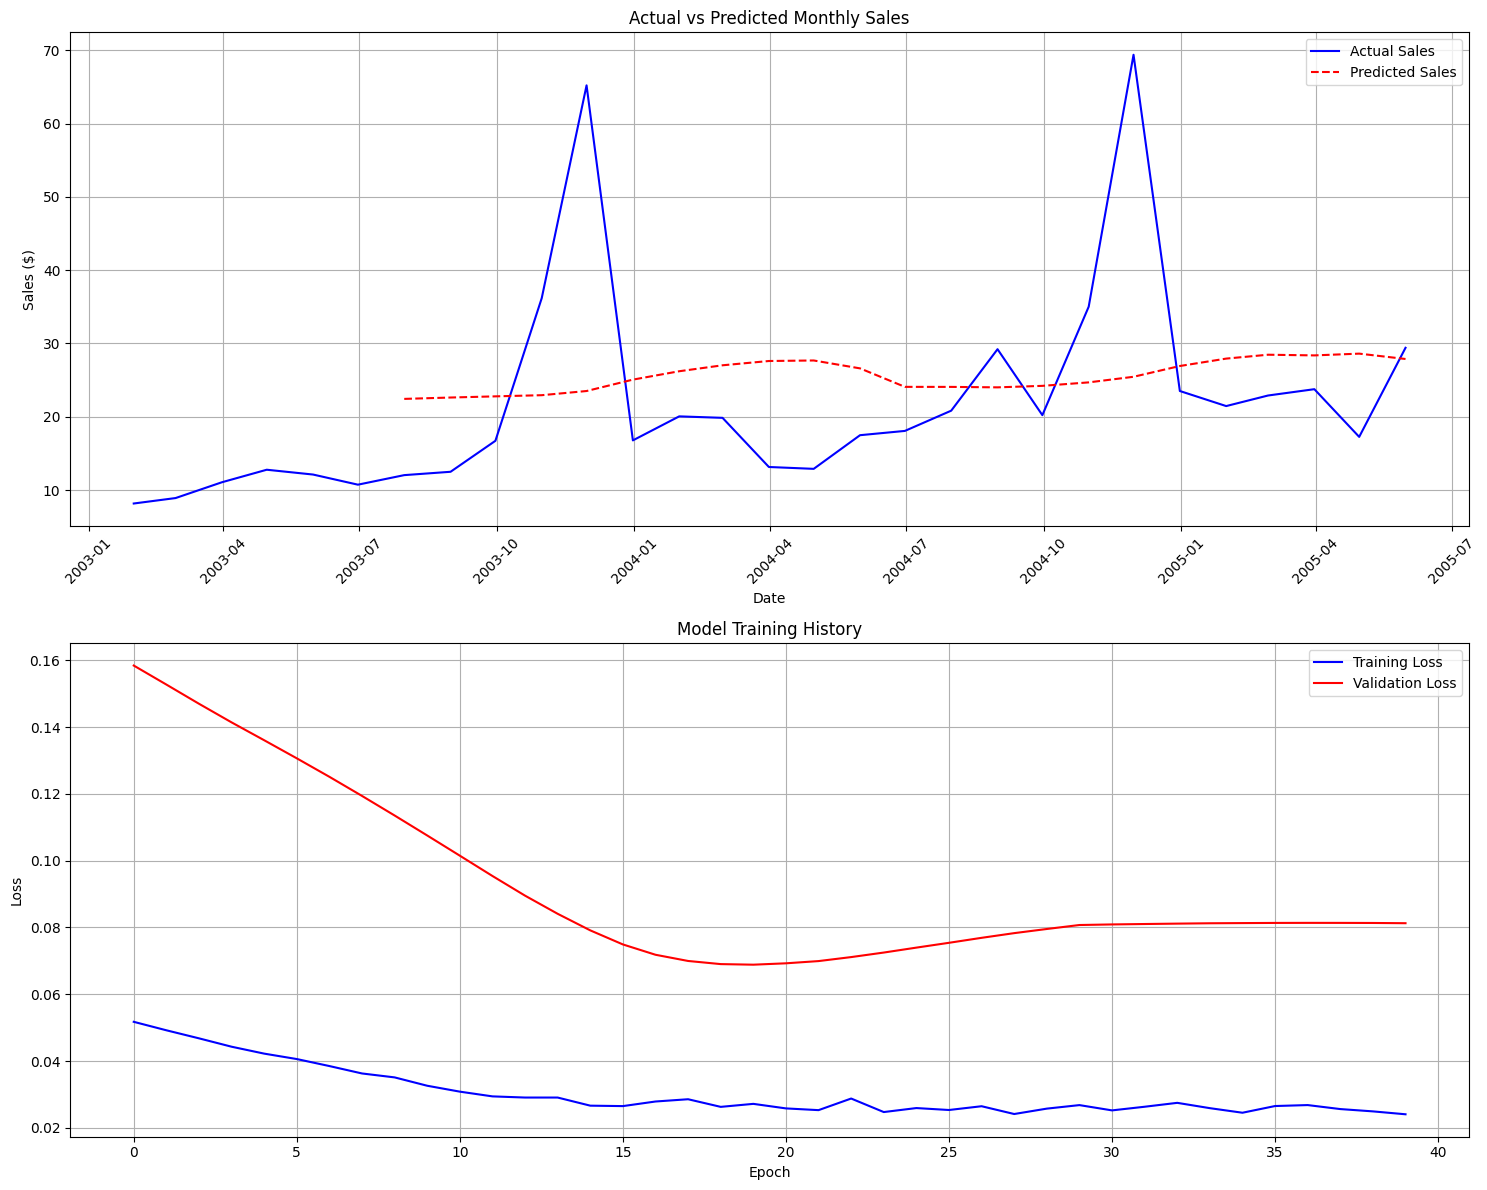

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 5
'y' sizes: 6


In [23]:
# Build enhanced LSTM model
def build_model(sequence_length):
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(128, activation='relu', input_shape=(sequence_length, 1),
                           return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss='huber')  # Huber loss is more robust to outliers
    return model

# Modified training function with improved parameters
def train_sales_predictor(df, sequence_length=6):  # Increased sequence length
    # Preprocess data
    monthly_sales = preprocess_data(df)

    # Scale the data
    scaler = MinMaxScaler()
    sales_scaled = scaler.fit_transform(monthly_sales['SALES'].values.reshape(-1, 1))

    # Create sequences
    X, y = create_sequences(sales_scaled, sequence_length)

    # Split into train and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build and train model
    model = build_model(sequence_length)

    # Add early stopping to prevent overfitting
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True
    )

    # Add learning rate reduction on plateau
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=10,
        min_lr=0.00001
    )

    # Train the model with more epochs and callbacks
    history = model.fit(
        X_train, y_train,
        epochs=200,
        batch_size=16,  # Smaller batch size
        validation_split=0.2,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Function to predict next month's sales
    def predict_next_month(recent_sales):
        scaled_input = scaler.transform(recent_sales.reshape(-1, 1))
        scaled_input = scaled_input.reshape(1, sequence_length, 1)
        scaled_prediction = model.predict(scaled_input)
        prediction = scaler.inverse_transform(scaled_prediction)
        return prediction[0][0]

    return model, scaler, predict_next_month, history

# Train the model with new parameters
model, scaler, predict_next_month, history = train_sales_predictor(df)

# Plotting code with both sales data and training metrics
import matplotlib.pyplot as plt

# Create subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot 1: Actual vs Predicted Sales
monthly_sales = preprocess_data(df)
actual_sales = monthly_sales['SALES'].values
sequence_length = 6  # Make sure this matches the sequence_length used in training

# Generate predictions
sales_scaled = scaler.transform(actual_sales.reshape(-1, 1))
X, _ = create_sequences(sales_scaled, sequence_length)
predictions_scaled = model.predict(X)
predictions = scaler.inverse_transform(predictions_scaled)

# Create time axis for plotting
time_points = monthly_sales['ORDERDATE'][sequence_length:]

# Plot sales
ax1.plot(monthly_sales['ORDERDATE'][:len(actual_sales)], actual_sales,
         label='Actual Sales', color='blue')
ax1.plot(time_points, predictions,
         label='Predicted Sales', color='red', linestyle='--')

ax1.set_title('Actual vs Predicted Monthly Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales ($)')
ax1.legend()
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Training History
ax2.plot(history.history['loss'], label='Training Loss', color='blue')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='red')
ax2.set_title('Model Training History')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print model evaluation metrics
X_test = X[int(len(X) * 0.8):]
y_test = y[int(len(y) * 0.8):]
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")

# Calculate and print MAPE (Mean Absolute Percentage Error)
y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
print(f"Mean Absolute Percentage Error: {mape:.2f}%")

<ipython-input-21-00b2d1b8f4d9>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='ORDERDATE', freq='M'))['SALES'].sum().reset_index()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


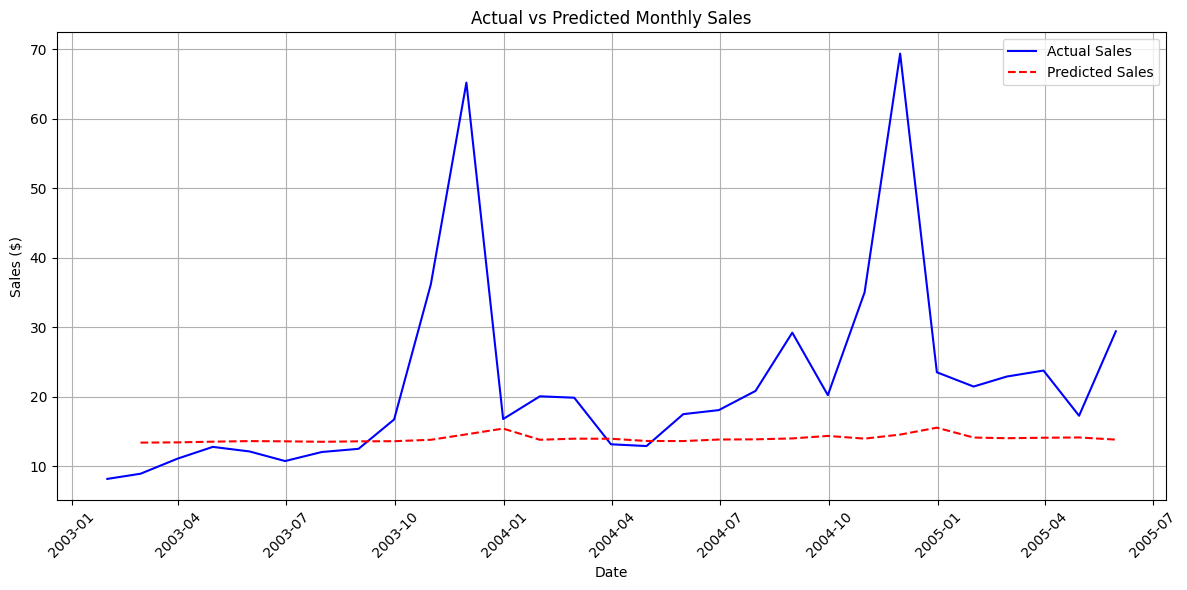

In [22]:
import matplotlib.pyplot as plt

# Get the actual values
monthly_sales = preprocess_data(df)
actual_sales = monthly_sales['SALES'].values

# Generate predictions for the entire period
sales_scaled = scaler.transform(actual_sales.reshape(-1, 1))
X, _ = create_sequences(sales_scaled, sequence_length)
predictions_scaled = model.predict(X)
predictions = scaler.inverse_transform(predictions_scaled)

# Create time axis for plotting
time_points = monthly_sales['ORDERDATE'][sequence_length:]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['ORDERDATE'][:len(actual_sales)], actual_sales,
         label='Actual Sales', color='blue')
plt.plot(time_points, predictions,
         label='Predicted Sales', color='red', linestyle='--')

plt.title('Actual vs Predicted Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from datetime import datetime

def load_csv_with_encoding(filepath):
    """Try different encodings to read the CSV file"""
    encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']

    for encoding in encodings:
        try:
            df = pd.read_csv(filepath, encoding=encoding)
            print(f"Successfully read file with {encoding} encoding")
            return df
        except UnicodeDecodeError:
            continue
    raise ValueError("Could not read file with any of the attempted encodings")

def prepare_data(filepath):
    # Read the CSV file with appropriate encoding
    df = load_csv_with_encoding(filepath)

    # Print column names to verify correct loading
    print("\nAvailable columns:", df.columns.tolist())

    # Convert date column - adjust column name if needed
    date_column = 'ORDERDATE' if 'ORDERDATE' in df.columns else 'SALES_ORDER_DATE'
    df[date_column] = pd.to_datetime(df[date_column])

    # Calculate total sales for each order
    quantity_col = 'QUANTITYORDERED' if 'QUANTITYORDERED' in df.columns else 'QUANTITY_ORDERED'
    price_col = 'PRICEEACH' if 'PRICEEACH' in df.columns else 'PRICE_EACH'

    df['SALES'] = df[quantity_col] * df[price_col]

    # Group by date and calculate daily sales
    daily_sales = df.groupby(date_column)['SALES'].sum().reset_index()

    # Sort by date
    daily_sales = daily_sales.sort_values(date_column)

    # Resample to monthly data and fill missing values
    monthly_sales = daily_sales.set_index(date_column).resample('M')['SALES'].sum().reset_index()

    return monthly_sales

def create_sequences(data, n_prev_months=3):
    """Create sequences of previous months' sales to predict next month"""
    X, y = [], []

    for i in range(len(data) - n_prev_months):
        X.append(data[i:(i + n_prev_months)])
        y.append(data[i + n_prev_months])

    return np.array(X), np.array(y)

def train_model(filepath, n_prev_months=3):
    try:
        # Prepare data
        monthly_sales = prepare_data(filepath)

        # Ensure we have enough data
        if len(monthly_sales) < n_prev_months + 2:
            raise ValueError(f"Not enough data points. Need at least {n_prev_months + 2} months of data.")

        # Create sequences
        X, y = create_sequences(monthly_sales['SALES'].values, n_prev_months)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Scale the data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train XGBoost model
        model = XGBRegressor(random_state=42)
        model.fit(X_train_scaled, y_train)

        # Make predictions
        y_pred = model.predict(X_test_scaled)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        return model, scaler, mse, r2, monthly_sales

    except Exception as e:
        print(f"Error during model training: {str(e)}")
        raise

def predict_next_month(model, scaler, last_months_sales):
    """Predict next month's sales based on previous months"""
    scaled_input = scaler.transform(last_months_sales.reshape(1, -1))
    prediction = model.predict(scaled_input)
    return prediction[0]

def plot_predictions(monthly_sales, y_test, y_pred):
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_sales.index[-len(y_test):], y_test, label='Actual Sales')
    plt.plot(monthly_sales.index[-len(y_pred):], y_pred, label='Predicted Sales')
    plt.title('Actual vs Predicted Monthly Sales')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

In [5]:
# Train the model
filepath = 'sales_data/sales_data_sample.csv'
model, scaler, mse, r2, monthly_sales = train_model(filepath)

print(f"Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Get the last 3 months of sales to predict the next month
last_3_months = monthly_sales['SALES'].values[-3:]
next_month_prediction = predict_next_month(model, scaler, last_3_months)
print(f"\nPredicted sales for next month: ${next_month_prediction:,.2f}")

Successfully read file with latin1 encoding

Available columns: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']


<ipython-input-4-24d7787671eb>:47: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = daily_sales.set_index(date_column).resample('M')['SALES'].sum().reset_index()


Model Performance:
Mean Squared Error: 8085537399.44
R-squared Score: -0.44

Predicted sales for next month: $267,070.44


# **Final Code**

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

def load_csv_with_encoding(filepath):
    """Try different encodings to read the CSV file"""
    encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']

    for encoding in encodings:
        try:
            df = pd.read_csv(filepath, encoding=encoding)
            print(f"Successfully read file with {encoding} encoding")
            return df
        except UnicodeDecodeError:
            continue
    raise ValueError("Could not read file with any of the attempted encodings")

def prepare_quantity_data(filepath):
    # Read the CSV file with appropriate encoding
    df = load_csv_with_encoding(filepath)

    # Convert date column - handle different possible column names
    date_column = 'ORDERDATE' if 'ORDERDATE' in df.columns else 'SALES_ORDER_DATE'
    df[date_column] = pd.to_datetime(df[date_column])

    # Get quantity column name
    quantity_col = 'QUANTITYORDERED' if 'QUANTITYORDERED' in df.columns else 'QUANTITY_ORDERED'

    # Group by date and calculate daily total quantities
    daily_quantities = df.groupby(date_column)[quantity_col].sum().reset_index()

    # Sort by date
    daily_quantities = daily_quantities.sort_values(date_column)

    # Resample to monthly data
    monthly_quantities = daily_quantities.set_index(date_column).resample('ME')[quantity_col].sum().reset_index()

    # Add features for seasonality
    monthly_quantities['Month'] = monthly_quantities[date_column].dt.month
    monthly_quantities['Year'] = monthly_quantities[date_column].dt.year

    return monthly_quantities, quantity_col

def create_quantity_features(data, quantity_col, n_prev_months=3):
    """Create features from previous months' quantities"""
    feature_cols = []

    # Create lagged features
    for i in range(1, n_prev_months + 1):
        col_name = f'prev_month_{i}'
        data[col_name] = data[quantity_col].shift(i)
        feature_cols.append(col_name)

    # Add month as cyclical feature
    data['month_sin'] = np.sin(2 * np.pi * data['Month']/12)
    data['month_cos'] = np.cos(2 * np.pi * data['Month']/12)
    feature_cols.extend(['month_sin', 'month_cos'])

    return data, feature_cols

def train_quantity_model(filepath, n_prev_months=3):
    try:
        # Prepare data
        monthly_data, quantity_col = prepare_quantity_data(filepath)

        # Create features
        data, feature_cols = create_quantity_features(monthly_data, quantity_col, n_prev_months)

        # Remove rows with NaN values (created by shifting)
        data = data.dropna()

        # Split features and target
        X = data[feature_cols]
        y = data[quantity_col]

        # Split into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train model
        model = XGBRegressor(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=5,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)

        # Make predictions
        y_pred = model.predict(X_test_scaled)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Print feature importances
        feature_importance = dict(zip(feature_cols, model.feature_importances_))
        print("\nFeature Importances:")
        for feat, imp in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
            print(f"{feat}: {imp:.4f}")

        return {
            'model': model,
            'scaler': scaler,
            'metrics': {
                'mse': mse,
                'mae': mae,
                'r2': r2
            },
            'feature_cols': feature_cols,
            'data': data,
            'quantity_col': quantity_col
        }

    except Exception as e:
        print(f"Error during model training: {str(e)}")
        raise

def predict_next_month_quantity(model_info, last_months_data):
    """Predict next month's quantity based on previous months"""
    # Prepare input data
    input_data = pd.DataFrame([last_months_data], columns=model_info['feature_cols'])

    # Scale input
    scaled_input = model_info['scaler'].transform(input_data)

    # Make prediction
    prediction = model_info['model'].predict(scaled_input)

    return prediction[0]

def plot_quantity_predictions(model_info):
    """Plot actual vs predicted quantities"""
    data = model_info['data']
    quantity_col = model_info['quantity_col']

    # Get predictions for all data points
    X_scaled = model_info['scaler'].transform(data[model_info['feature_cols']])
    predictions = model_info['model'].predict(X_scaled)

    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[quantity_col], label='Actual Quantities', marker='o')
    plt.plot(data.index, predictions, label='Predicted Quantities', marker='x')
    plt.title('Actual vs Predicted Monthly Order Quantities')
    plt.xlabel('Sample Index')
    plt.ylabel('Quantity Ordered')
    plt.legend()
    plt.grid(True)
    plt.show()

Successfully read file with latin1 encoding

Feature Importances:
prev_month_1: 0.7855
month_sin: 0.1779
prev_month_2: 0.0306
month_cos: 0.0046
prev_month_3: 0.0016

Model Performance Metrics:
Mean Squared Error: 10603713.00
Mean Absolute Error: 1869.76
R-squared Score: -12.37

Predicted quantity for next month: 3,067 units


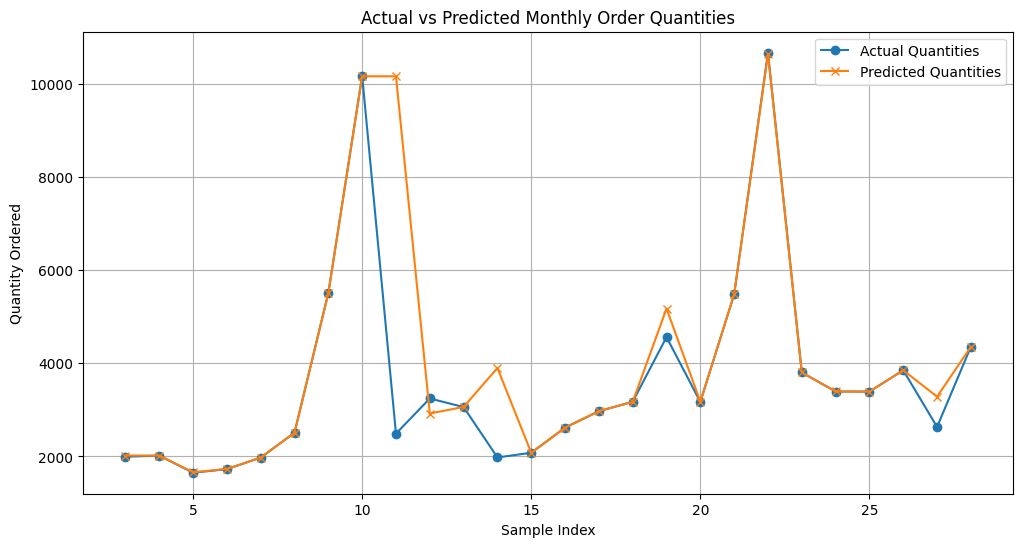

In [9]:
# Train the model
filepath = 'sales_data/sales_data_sample.csv'
model_info = train_quantity_model(filepath)

# Print model performance
print("\nModel Performance Metrics:")
print(f"Mean Squared Error: {model_info['metrics']['mse']:.2f}")
print(f"Mean Absolute Error: {model_info['metrics']['mae']:.2f}")
print(f"R-squared Score: {model_info['metrics']['r2']:.2f}")

# Get the last data point
data = model_info['data']
recent_data = {
    'prev_month_1': data[model_info['quantity_col']].iloc[-1],
    'prev_month_2': data[model_info['quantity_col']].iloc[-2],
    'prev_month_3': data[model_info['quantity_col']].iloc[-3],
    'month_sin': np.sin(2 * np.pi * ((data['Month'].iloc[-1] % 12 + 1)/12)),
    'month_cos': np.cos(2 * np.pi * ((data['Month'].iloc[-1] % 12 + 1)/12))
}

# Predict next month's quantity
next_month_quantity = predict_next_month_quantity(model_info, recent_data)
print(f"\nPredicted quantity for next month: {int(next_month_quantity):,} units")

# Plot the results
plot_quantity_predictions(model_info)

In [10]:
import pickle
import joblib
from datetime import datetime

def save_model_artifacts(model_info, filepath='model/'):
    """Save all necessary model artifacts"""
    import os

    # Create directory if it doesn't exist
    os.makedirs(filepath, exist_ok=True)

    # Save model artifacts
    artifacts = {
        'model': model_info['model'],
        'scaler': model_info['scaler'],
        'feature_cols': model_info['feature_cols'],
        'metrics': model_info['metrics'],
        'training_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    }

    # Save using joblib for better handling of scikit-learn objects
    joblib.dump(artifacts, filepath + 'quantity_prediction_model.pkl')
    print(f"Model saved successfully at {filepath + 'quantity_prediction_model.pkl'}")

In [11]:
save_model_artifacts(model_info)

Model saved successfully at model/quantity_prediction_model.pkl


In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import joblib
import numpy as np
import os

app = Flask(__name__)
CORS(app)

# Load model artifacts
model_path = 'model/quantity_prediction_model.pkl'
model_artifacts = joblib.load(model_path)

def prepare_prediction_data(current_month_quantity, month_number):
    """Prepare data for prediction"""
    # Create cyclic month features
    month_sin = np.sin(2 * np.pi * month_number/12)
    month_cos = np.cos(2 * np.pi * month_number/12)

    # For simplicity, we'll use the current quantity for all previous months
    # In a production environment, you might want to store and use actual historical data
    data = {
        'prev_month_1': current_month_quantity,
        'prev_month_2': current_month_quantity,
        'prev_month_3': current_month_quantity,
        'month_sin': month_sin,
        'month_cos': month_cos
    }

    return data

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()

        if not data or 'current_quantity' not in data or 'month' not in data:
            return jsonify({
                'error': 'Missing required fields: current_quantity and month'
            }), 400

        current_quantity = float(data['current_quantity'])
        month = int(data['month'])

        if month < 1 or month > 12:
            return jsonify({
                'error': 'Month must be between 1 and 12'
            }), 400

        # Prepare data for prediction
        prediction_data = prepare_prediction_data(current_quantity, month)

        # Create input array
        input_data = [prediction_data[col] for col in model_artifacts['feature_cols']]

        # Scale the input
        scaled_input = model_artifacts['scaler'].transform([input_data])

        # Make prediction
        prediction = model_artifacts['model'].predict(scaled_input)[0]

        return jsonify({
            'predicted_quantity': int(prediction),
            'model_metrics': model_artifacts['metrics'],
            'training_date': model_artifacts['training_date']
        })

    except Exception as e:
        return jsonify({
            'error': str(e)
        }), 500

if __name__ == '__main__':
    port = int(os.environ.get('PORT', 5000))
    app.run(host='0.0.0.0', port=port, debug=True)